Fatigue Level
===

1. New col: Effectiveness (Session effectiveness)
2. New col: Session Fatigue (Estimates the fatigue caused in a session)
3. New col: Recovery (Estimates recovery level from recovery/rest)
4. New col: Fatigue (Estimates Fatigue level from Session Fatigue and Recovery

Seems decent:
* At 2016-05, fatigue > 1000, where I had a injurt

* Parameters can be tuned by ML
* Need to add in other activity types
* Can estimate fitness level (gain/loss in fitness) from constant minor overtraining

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

sns.set_style('white')

df = pd.read_pickle('df_run.p')

In [2]:
df.head()

,id,athlete_count,distance,avg_speed,avg_hr,type,elevation_gain,latlng,pace,duration,zone
date,,,,,,,,,,,
2017-07-07 18:00:38,1176094669,1,5022.2,2.589,NaN,Run,21.9,"(55.95, -3.19)",6.437492,32.333333,NaN
2017-07-05 17:50:32,1173071844,1,4977.9,2.469,148.3,Run,20.5,"(55.95, -3.19)",6.750371,33.600000,2.0
2017-07-01 16:30:48,1173071487,1,2889.1,2.586,160.1,Run,20.4,"(55.95, -3.19)",6.444960,18.616667,3.0
2017-06-28 19:55:15,1163118846,1,414.8,2.942,NaN,Run,0.0,"(55.95, -3.19)",5.665080,2.350000,NaN
2017-06-28 19:30:59,1163118747,1,2732.6,2.598,NaN,Run,75.0,"(55.96, -3.16)",6.415191,17.533333,NaN


In [3]:
df.shape

(129, 11)

In [4]:
df.dtypes

id                 object
athlete_count       int64
distance          float64
avg_speed         float64
avg_hr            float64
type               object
elevation_gain    float64
latlng             object
pace              float64
duration          float64
zone              float64
dtype: object

In [5]:
# New col: Effectiveness
# Define Efffectiveness

def duration_to_effectiveness(duration):
    if duration >= 60:
        return 10
    if duration >= 40 and duration < 60:
        return 7
    if duration >= 30 and duration < 40:
        return 5
    else:
        return 2

In [6]:
df['Effectiveness'] = df['duration'].apply(duration_to_effectiveness)

In [7]:
df.Effectiveness.value_counts()

2     64
5     24
7     21
10    20
Name: Effectiveness, dtype: int64

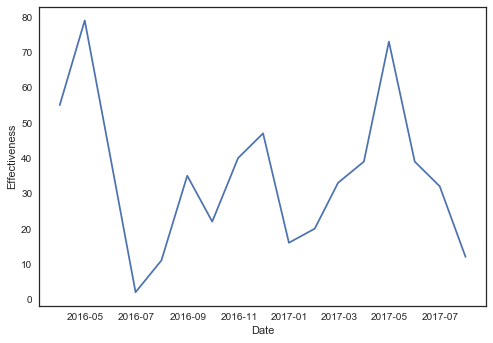

In [8]:
# see month to month effectiveness
plt.plot(df.resample('M')['Effectiveness'].sum());
plt.xlabel('Date')
plt.ylabel('Effectiveness')

# df.groupby(df.index.month)['Effectiveness'].sum()

In [9]:
# New col: Fatigue
# Define Fatigue

def function_fatigue(duration, spd, elev):
    # session fatigue
    # constants
    a = 1
    b = 1
    c = 0.002
    
    fatigue = duration * a * spd * b * (elev * c + 1)
    return fatigue    

In [10]:
df['Session_Fatigue'] = df.apply(lambda x: function_fatigue(x['duration'], x['avg_speed'], x['elevation_gain']), axis=1)

In [11]:
# NOTE: Need to fix 'type' (race data missing)

In [12]:
# New col: Cummulative Fatigue
# df['C_Fatigue'] = df.sort_index()['Session_Fatigue'].cumsum()

In [13]:
# sort index from old to new
df = df.sort_index()

In [14]:
df.index[1] - df.index[0]

Timedelta('2 days 00:35:06')

In [15]:
# New col: Recovery
df['Date'] = df.index
df['Recovery_Time'] = (df.Date - df.Date.shift(1)).fillna(0)

In [16]:
df.sort_values('Session_Fatigue', ascending=False)

,id,athlete_count,distance,avg_speed,avg_hr,type,elevation_gain,latlng,pace,duration,zone,Effectiveness,Session_Fatigue,Date,Recovery_Time
date,,,,,,,,,,,,,,,
2016-05-07 17:09:06,622535408,1,14564.1,2.560,NaN,Run,267.7,"(55.95, -3.19)",6.510417,94.816667,NaN,10,372.688666,2016-05-07 17:09:06,1 days 23:25:05
2016-05-29 08:15:27,647014769,127,21306.6,2.652,NaN,Run,36.4,"(55.95, -3.18)",6.284565,130.950000,NaN,10,372.561340,2016-05-29 08:15:27,4 days 11:45:27
2016-11-19 16:10:46,863386903,1,17246.2,2.395,170.3,Run,132.6,"(55.95, -3.19)",6.958942,120.016667,5.0,10,363.668983,2016-11-19 16:10:46,4 days 21:24:14
2016-04-23 17:00:07,607990831,1,13960.3,2.705,NaN,Run,266.0,"(55.95, -3.19)",6.161429,86.016667,NaN,10,356.458228,2016-04-23 17:00:07,1 days 23:29:59
2016-04-17 09:43:04,601122571,78,16209.9,3.002,NaN,Run,160.1,"(55.95, -3.17)",5.551854,89.100000,NaN,10,353.124720,2016-04-17 09:43:04,0 days 20:42:20
2016-03-27 17:35:51,581013995,1,13503.7,2.612,NaN,Run,260.1,"(55.95, -3.19)",6.380807,86.166667,NaN,10,342.147360,2016-03-27 17:35:51,3 days 00:26:49
2016-04-02 17:11:38,586510790,1,13055.8,2.583,NaN,Run,273.5,"(55.95, -3.19)",6.452445,84.250000,NaN,10,336.654659,2016-04-02 17:11:38,5 days 23:35:47
2016-04-30 17:14:59,614861265,1,13223.9,2.476,NaN,Run,260.3,"(55.95, -3.19)",6.731287,89.016667,NaN,10,335.148248,2016-04-30 17:14:59,1 days 22:32:39
2017-04-29 11:14:18,1063577532,1,14401.5,2.778,NaN,Run,168.0,"(55.95, -3.19)",5.999520,86.416667,NaN,10,320.727508,2017-04-29 11:14:18,1 days 18:31:25


In [17]:
# New col: Recovery

def function_recovery(recov_time):
    # unit: day
    recov_duration = recov_time.days + recov_time.seconds/86400
    a = 50
    recovery = recov_duration * a
    return recovery

In [18]:
df['Recovery'] = df['Recovery_Time'].apply(function_recovery)

In [19]:
# df['Fatigue'] = 0

# df['Fatigue'] = df['Fatigue'].shift(1) + df['Session_Fatigue'] - df['Recovery']

# df.head()

In [20]:
a = []
for row in df.iterrows():
    a.append(row)

In [21]:
i = 0
fatigue = []

for row in df.iterrows():
    # Store previous Session_Fatigue in last_fat
    # skip first row
    if i == 0:
        fatigue.append(row[1]['Session_Fatigue'])
    else:
        load = fatigue[-1] + row[1]['Session_Fatigue'] - row[1]['Recovery']
        # Minimum fatigue == 0
        # If == 0, fatigue = session_fatigue
        if load > 0:
            fatigue.append(load)
        else:
            fatigue.append(row[1]['Session_Fatigue'])
                
    i += 1

In [22]:
df['Fatigue'] = fatigue

In [23]:
df

,id,athlete_count,distance,avg_speed,avg_hr,type,elevation_gain,latlng,pace,duration,zone,Effectiveness,Session_Fatigue,Date,Recovery_Time,Recovery,Fatigue
date,,,,,,,,,,,,,,,,,
2016-03-04 15:54:05,560293624,1,9838.8,2.890,NaN,Run,13.8,"(55.95, -3.19)",5.767013,56.750000,NaN,7,168.534107,2016-03-04 15:54:05,0 days 00:00:00,0.000000,168.534107
2016-03-06 16:29:11,562178804,1,6024.6,2.640,NaN,Run,15.9,"(55.95, -3.19)",6.313131,38.033333,NaN,5,103.600974,2016-03-06 16:29:11,2 days 00:35:06,101.218750,170.916331
2016-03-08 17:09:20,563946932,1,5071.4,2.974,NaN,Run,14.2,"(55.95, -3.19)",5.604125,28.416667,NaN,2,86.911284,2016-03-08 17:09:20,2 days 00:40:09,101.394097,156.433518
2016-03-10 17:25:11,565538581,2,5154.1,2.837,NaN,Run,14.9,"(55.95, -3.19)",5.874750,30.283333,NaN,5,88.474048,2016-03-10 17:25:11,2 days 00:15:51,100.550347,144.357219
2016-03-14 17:17:56,569375750,1,8595.7,2.704,NaN,Run,156.8,"(55.95, -3.19)",6.163708,52.983333,NaN,7,188.195444,2016-03-14 17:17:56,3 days 23:52:45,199.748264,132.804399
2016-03-20 08:30:33,574271721,74,12943.8,2.936,NaN,Run,91.7,"(55.98, -3.17)",5.676658,72.350000,NaN,10,251.377355,2016-03-20 08:30:33,5 days 15:12:37,281.688079,102.493675
2016-03-22 17:07:08,576395483,1,2847.7,3.072,NaN,Run,15.0,"(55.95, -3.19)",5.425347,15.450000,NaN,2,48.886272,2016-03-22 17:07:08,2 days 08:36:35,117.936921,33.443026
2016-03-24 17:09:02,578155259,1,7384.4,2.953,NaN,Run,13.4,"(55.95, -3.19)",5.643978,41.683333,NaN,7,126.389719,2016-03-24 17:09:02,2 days 00:01:54,100.065972,59.766772
2016-03-27 17:35:51,581013995,1,13503.7,2.612,NaN,Run,260.1,"(55.95, -3.19)",6.380807,86.166667,NaN,10,342.147360,2016-03-27 17:35:51,3 days 00:26:49,150.931134,250.982998


In [24]:
df.to_pickle('df_run_fatigue.p')

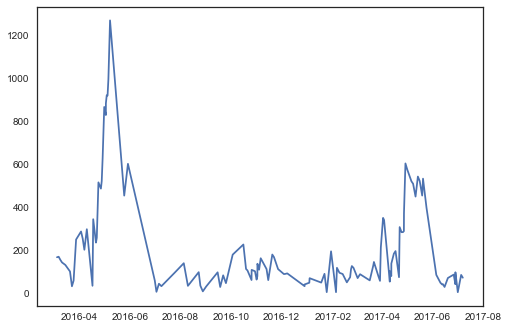

In [25]:
plt.plot(df.Fatigue);